<a href="https://colab.research.google.com/github/camilletulipe06-wq/Quantitative-Methods-2---Research-Project/blob/main/Part_3_coding_(assumptions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Summary statistics

import pandas as pd

df3 = pd.read_csv("QM 2 projects data - data for countries in part 3.csv")

country_column = "country"
columns = ["lower secondary school completion rate", "maternal mortality"]

for column in columns:
    df3[column] = pd.to_numeric(df3[column], errors="coerce")

s_df3 = df3[[country_column] + columns]

summary_by_country = s_df3.groupby(country_column)[columns].describe().round(2)

summary_by_country

lower secondary school completion rate                 \
                                                     count    mean    std   
country                                                                     
Algeria                                               34.0   73.06  19.17   
Bahrain                                               27.0   95.19   6.71   
Botswana                                              26.0   79.34  21.19   
Burundi                                               24.0   15.01  13.57   
Chad                                                  22.0    6.08   3.77   
Egypt                                                 14.0   75.83   6.56   
Madagascar                                            32.0   24.11   9.67   
Seychelles                                            29.0  111.92  15.66   
Trinidad and Tobago                                   14.0   81.77   7.10   

                                                           maternal mortality  \
                       min     25%     50%     75%     max              count   
country                                                                         
Algeria              38.01   55.97   71.35   86.27  135.24               39.0   
Bahrain              73.67   92.29   94.94  100.07  104.22               39.0   
Botswana             16.53   83.50   88.69   91.51   97.11               39.0   
Burundi               0.59    2.97   10.98   26.16   41.78               39.0   
Chad                  1.31    2.16    5.32    9.13   13.52               39.0   
Egypt                60.07   72.45   75.63   78.53   85.69               39.0   
Madagascar           11.35   14.52   24.01   34.02   40.58               39.0   
Seychelles           90.04  100.13  107.99  116.55  154.07               39.0   
Trinidad and Tobago  70.95   76.48   81.06   87.59   95.81               39.0   

                                                                             
                        mean     std    min     25%     50%     75%     max  
country                                                                      
Algeria               129.64   63.90   62.0    81.0    97.0   190.0   292.0  
Bahrain                23.36    8.68    5.0    17.0    21.0    32.0    37.0  
Botswana              188.56   75.13   46.0   133.5   166.0   246.5   319.0  
Burundi               881.74  418.44  392.0   544.0   687.0  1264.5  1801.0  
Chad                 1125.59  127.53  748.0  1093.0  1151.0  1201.5  1285.0  
Egypt                  57.03   36.04   17.0    30.0    43.0    78.0   141.0  
Madagascar            577.26  101.28  439.0   479.0   555.0   684.0   751.0  
Seychelles             51.00   10.07   37.0    45.5    49.0    52.0    89.0  
Trinidad and Tobago    66.23   16.49   30.0    53.0    63.0    84.0    89.0

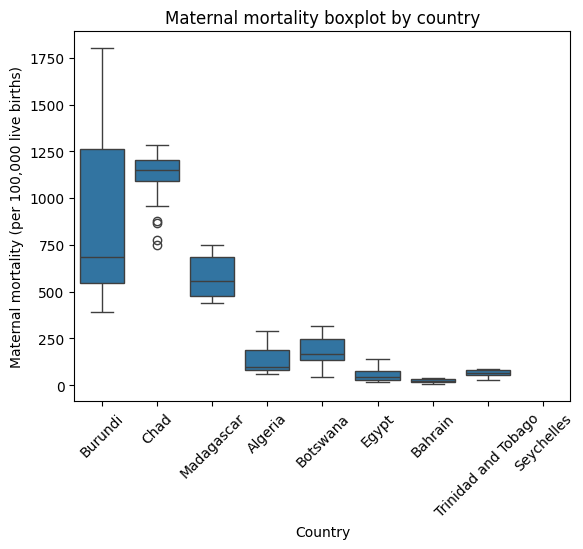

In [ ]:
# Maternal mortality boxplot by country

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df3, x="country", y="maternal mortality", order=["Burundi", "Chad", "Madagascar", "Algeria", "Botswana", "Egypt", "Bahrain", "Trinidad and Tobago", "Seychelles"])

plt.xlabel("Country")
plt.ylabel("Maternal mortality (per 100,000 live births)")
plt.title("Maternal mortality boxplot by country")
plt.xticks(rotation=45)
plt.show()

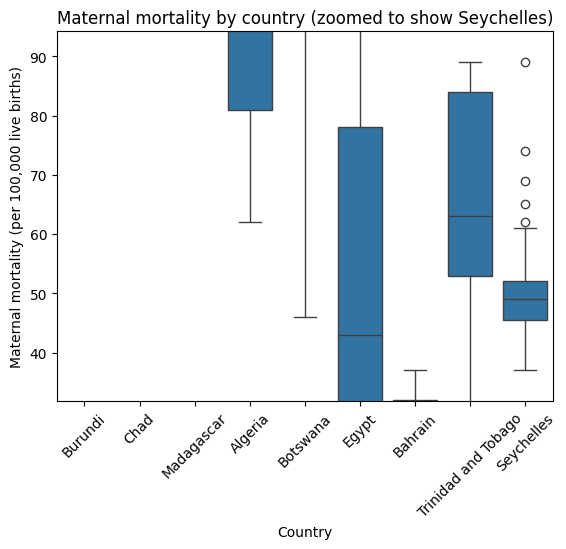

In [ ]:
# Maternal mortality boxplot by country (zoomed in to see Seychelles)

df3["maternal mortality"] = pd.to_numeric(df3["maternal mortality"], errors="coerce")
df3["country"] = df3["country"].astype(str).str.strip()
ax = sns.boxplot(data=df3, x="country", y="maternal mortality", order=["Burundi", "Chad", "Madagascar", "Algeria", "Botswana", "Egypt", "Bahrain", "Trinidad and Tobago", "Seychelles"])

seychelles = df3[df3["country"] == "Seychelles"]["maternal mortality"]
ymin, ymax = seychelles.min(), seychelles.max()
pad = 0.10 * (ymax - ymin) if ymax > ymin else 10
ax.set_ylim(ymin - pad, ymax + pad)

plt.xlabel("Country")
plt.ylabel("Maternal mortality (per 100,000 live births)")
plt.title("Maternal mortality by country (zoomed to show Seychelles)")
plt.xticks(rotation=45)
plt.show()

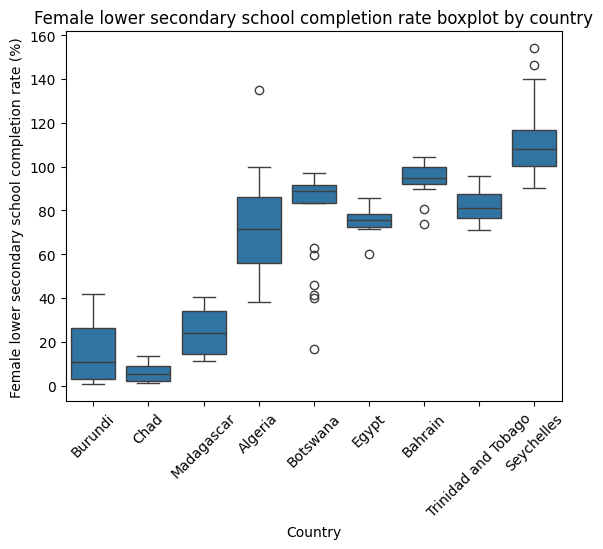

In [ ]:
# Female lower secondary school completion boxplot by country

sns.boxplot(data=df3, x="country", y="lower secondary school completion rate", order=["Burundi", "Chad", "Madagascar", "Algeria", "Botswana", "Egypt", "Bahrain", "Trinidad and Tobago", "Seychelles"])

plt.xlabel("Country")
plt.ylabel("Female lower secondary school completion rate (%)")
plt.title("Female lower secondary school completion rate boxplot by country")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0.98, 'Female lower secondary school completion rate vs maternal mortality by country')

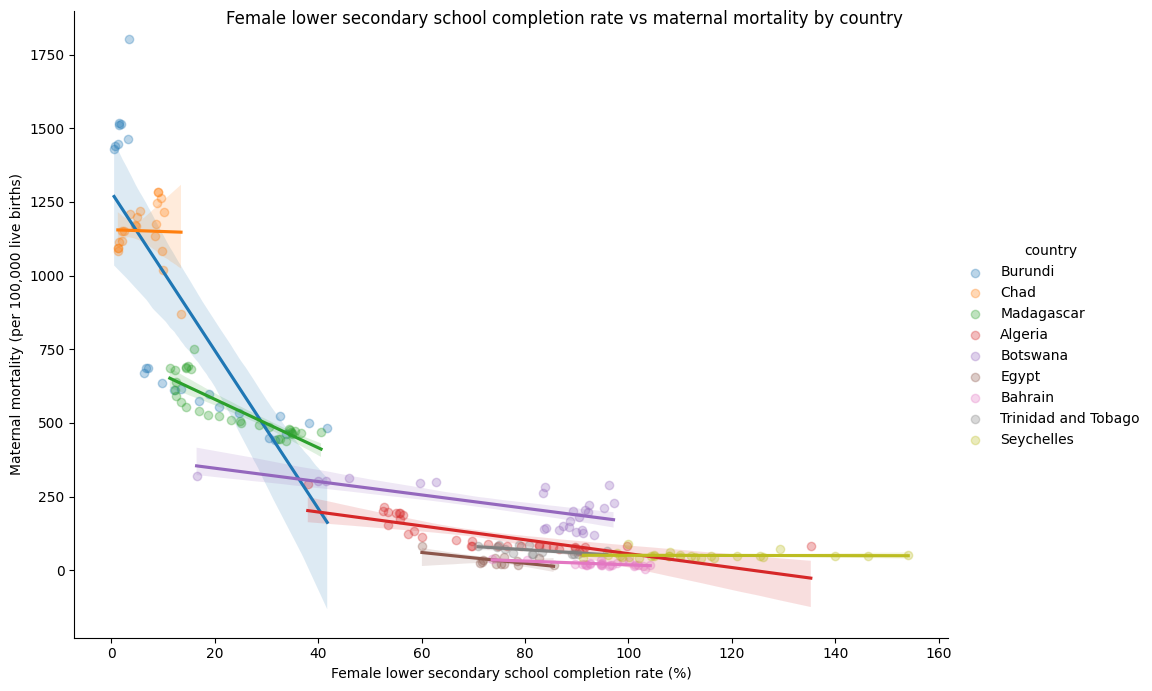

In [ ]:
# Regression plot

df3.columns = df3.columns.str.strip()

x_column = "lower secondary school completion rate"
y_column = "maternal mortality"

df3[x_column] = pd.to_numeric(df3[x_column], errors="coerce")
df3[y_column] = pd.to_numeric(df3[y_column], errors="coerce")

df3 = df3.dropna(subset=[country_column, x_column, y_column])

g = sns.lmplot(data=df3, x=x_column, y=y_column, hue=country_column, scatter_kws={"alpha": 0.3}, height=7, aspect=1.4)

g.set_axis_labels("Female lower secondary school completion rate (%)", "Maternal mortality (per 100,000 live births)")

g.fig.suptitle("Female lower secondary school completion rate vs maternal mortality by country")

In [ ]:
df3['income level'] = df3[['income level']].astype('category')

Text(0.5, 1.0, 'Correlation Matrix')

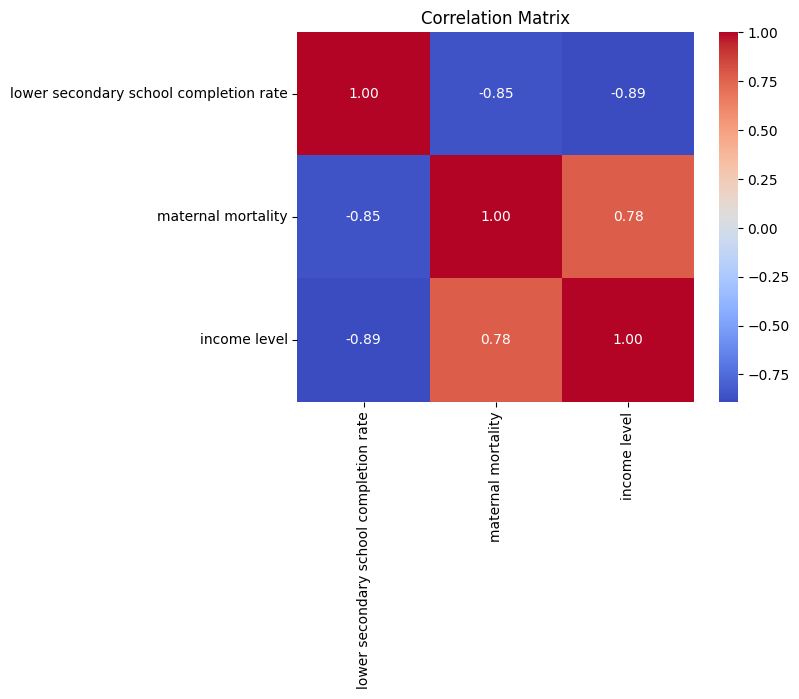

In [ ]:
# Correlation matrix

sns.heatmap(df3[["lower secondary school completion rate", "maternal mortality", "income level"]].corr(),
            annot=True,
            fmt=".2f",
            cmap='coolwarm')

plt.title('Correlation Matrix')